In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

BASE_DIR = os.path.abspath("../")
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

from src import config, utils, image, clustering, main

custom_modules = [module for name, module in sys.modules.items() if name.startswith('src.')]

for custom_module in custom_modules:
    reload(custom_module)

In [3]:
%%time

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
 
# Read sample 'simple3' from file.
# sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sample = pd.read_csv(config.sentinel_selected_table_data_path, index_col=False)
 
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()

CPU times: total: 2.16 s
Wall time: 2.2 s


In [17]:
%%time

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 50.
xmeans_instance = xmeans(sample, initial_centers, 100)
xmeans_instance.process()

CPU times: total: 17min 49s
Wall time: 17min 11s


In [6]:
%%time
# 20 clusters
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
 
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
 
# # Visualize clustering results
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
# visualizer.show()

Total WCE: 84298409186.35349
CPU times: total: 0 ns
Wall time: 0 ns


In [12]:
%%time
# 35 clusters
# Extract clustering results: clusters and their centers 
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
 
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
 
# # Visualize clustering results
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
# visualizer.show()

Total WCE: 51441283071.48911
CPU times: total: 0 ns
Wall time: 0 ns


In [15]:
%%time
# 50 clusters
# Extract clustering results: clusters and their centers 
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
 
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
 
# # Visualize clustering results
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
# visualizer.show()

Total WCE: 38017893151.80682
CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%%time
# 100 clusters
# Extract clustering results: clusters and their centers 
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
 
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
 
# # Visualize clustering results
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
# visualizer.show()

Total WCE: 22124888803.07424
CPU times: total: 0 ns
Wall time: 0 ns


In [20]:
len(clusters)

100

In [7]:
main.get_kmeans_5_clusters_stats()
stats = pd.read_csv(config.selected_n_clusters_stats_path, index_col=False)
stats

,modis_point_x,modis_point_y,modis_class,coordinate_x,coordinate_y,sentinel_class_0_count,sentinel_class_1_count,sentinel_class_2_count,sentinel_class_3_count,sentinel_class_4_count,sentinel_majority_class
0,20,1,3,405443.965899,6.299807e+06,127,60,57,0,540,4
1,16,2,3,404343.060770,6.299532e+06,32,187,529,35,1,2
2,17,2,3,404618.287052,6.299532e+06,231,490,37,1,25,1
3,21,2,3,405719.192181,6.299532e+06,357,7,0,0,420,4
4,32,2,3,408746.681286,6.299532e+06,395,15,0,0,374,0
...,...,...,...,...,...,...,...,...,...,...,...
303,41,70,11,411223.717826,6.280816e+06,315,0,0,0,469,4
304,42,70,11,411498.944108,6.280816e+06,67,0,0,0,717,4
305,1,71,12,400214.666536,6.280541e+06,305,1,0,0,478,4
306,24,71,12,406544.871028,6.280541e+06,436,1,0,0,347,0


In [9]:
modis_classes = np.unique(stats["modis_class"])

for modis_class in modis_classes:
    unique, counts = np.unique(
        stats[stats["modis_class"] == modis_class]["sentinel_majority_class"],
        return_counts=True,
    )
    print(
        f"{utils.get_class_name_by_index(modis_class)}, modis -> sentinel: {modis_class} -> {unique[counts.argmax()]}"
    )
    for i in range(len(unique)):
        print(f"\tsentinel class: {unique[i]}, count: {counts[i]}")
    # plt.pie(counts, labels=list(unique))
    # plt.title(utils.get_class_name_by_index(modis_class))
    # plt.show()

Лиственный лес, modis -> sentinel: 3 -> 0
	sentinel class: 0, count: 38
	sentinel class: 1, count: 8
	sentinel class: 2, count: 1
	sentinel class: 3, count: 1
	sentinel class: 4, count: 18
Луга, modis -> sentinel: 8 -> 2
	sentinel class: 2, count: 15
	sentinel class: 3, count: 1
Смешанный лес, modis -> sentinel: 11 -> 4
	sentinel class: 4, count: 5
Смешанный лес с преобладанием лиственных, modis -> sentinel: 12 -> 0
	sentinel class: 0, count: 122
	sentinel class: 4, count: 99


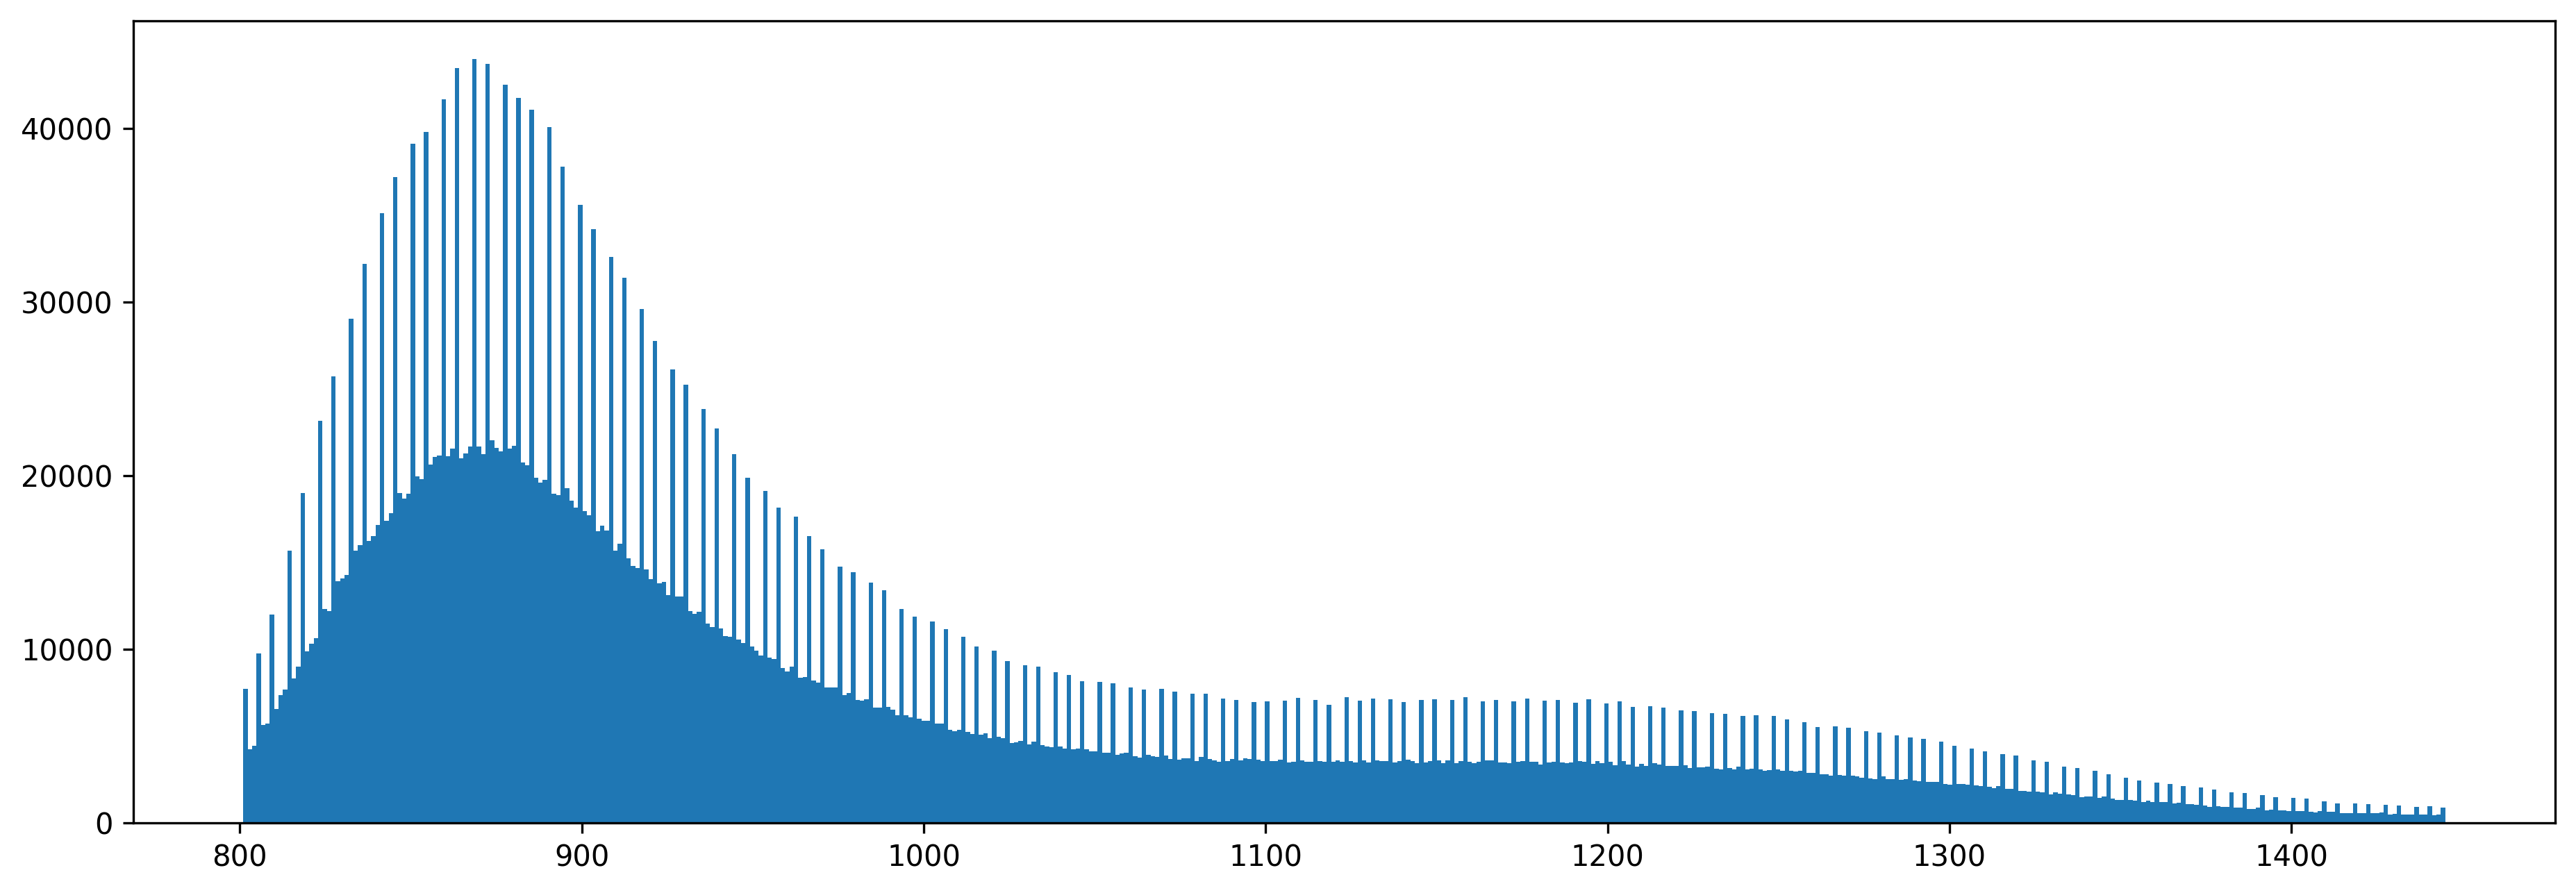

In [15]:
data = pd.read_csv(config.sentinel_selected_table_data_path, index_col=False)

band = data["Blue"]
right = band.quantile(q=0.99)
left = -(-band).quantile(.99)
plt.figure(figsize=(15,5), dpi=300)
plt.hist(band[left < band][band < right], bins=500)
plt.show()

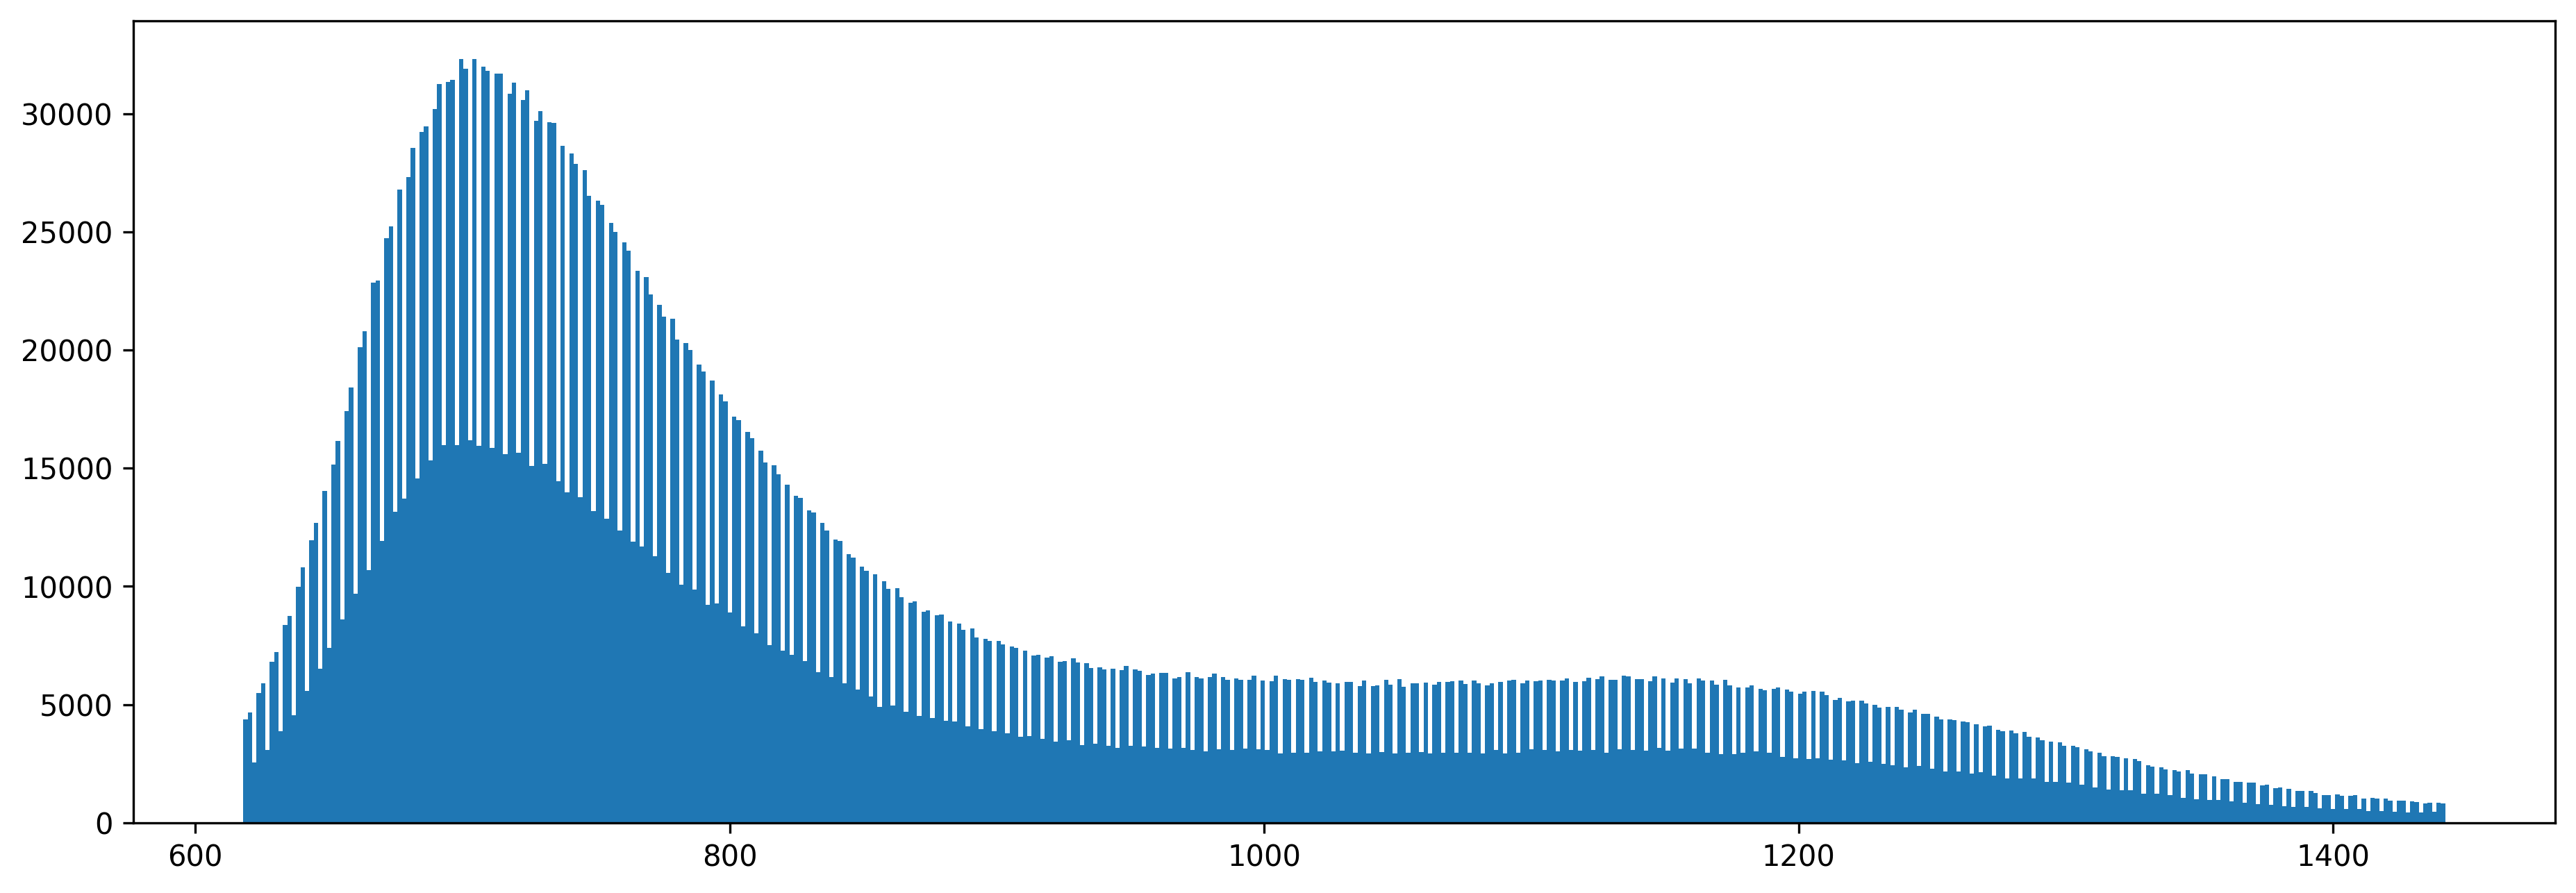

In [16]:
band = data["Green"]
right = band.quantile(q=0.99)
left = -(-band).quantile(.99)
plt.figure(figsize=(15,5), dpi=300)
plt.hist(band[left < band][band < right], bins=500)
plt.show()

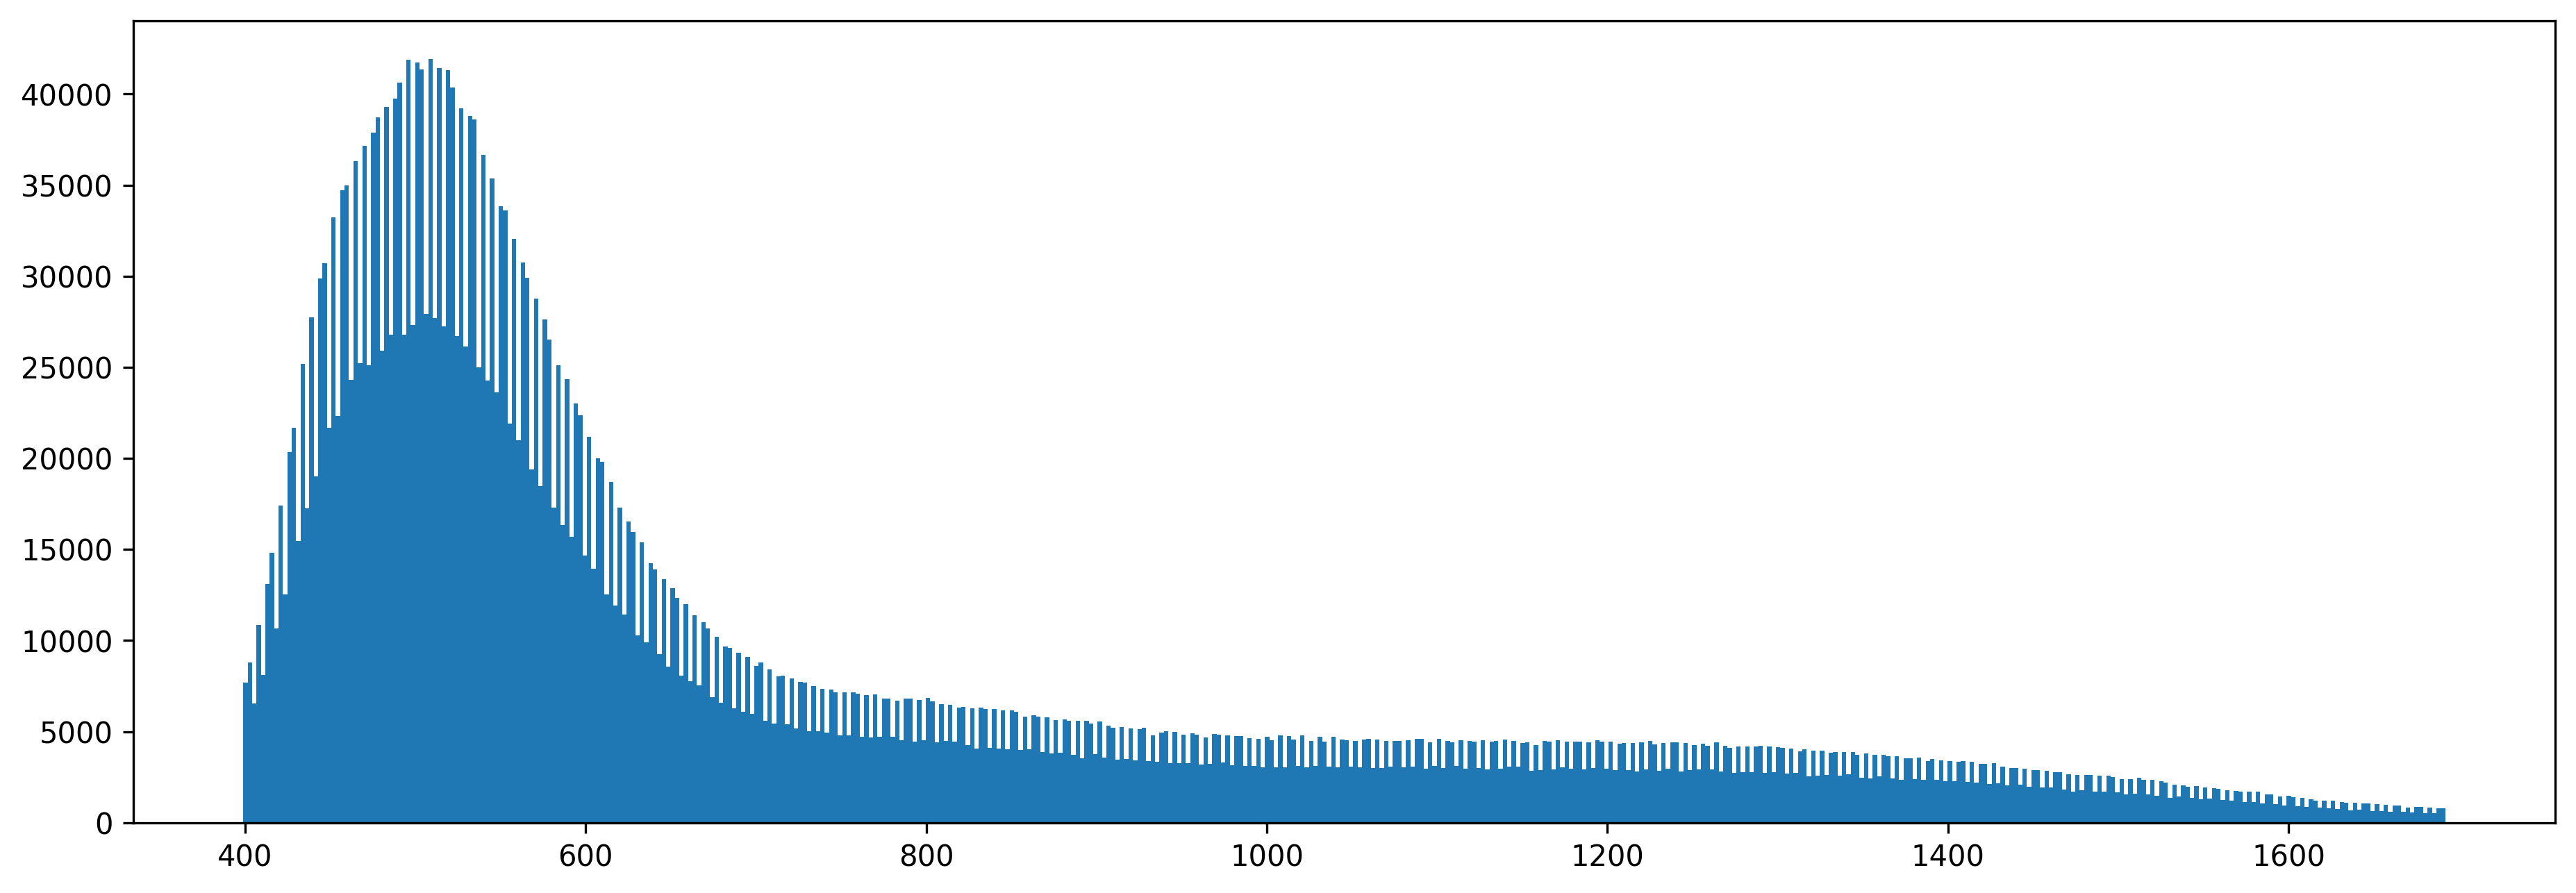

In [17]:
band = data["Red"]
right = band.quantile(q=0.99)
left = -(-band).quantile(.99)
plt.figure(figsize=(15,5), dpi=300)
plt.hist(band[left < band][band < right], bins=500)
plt.show()

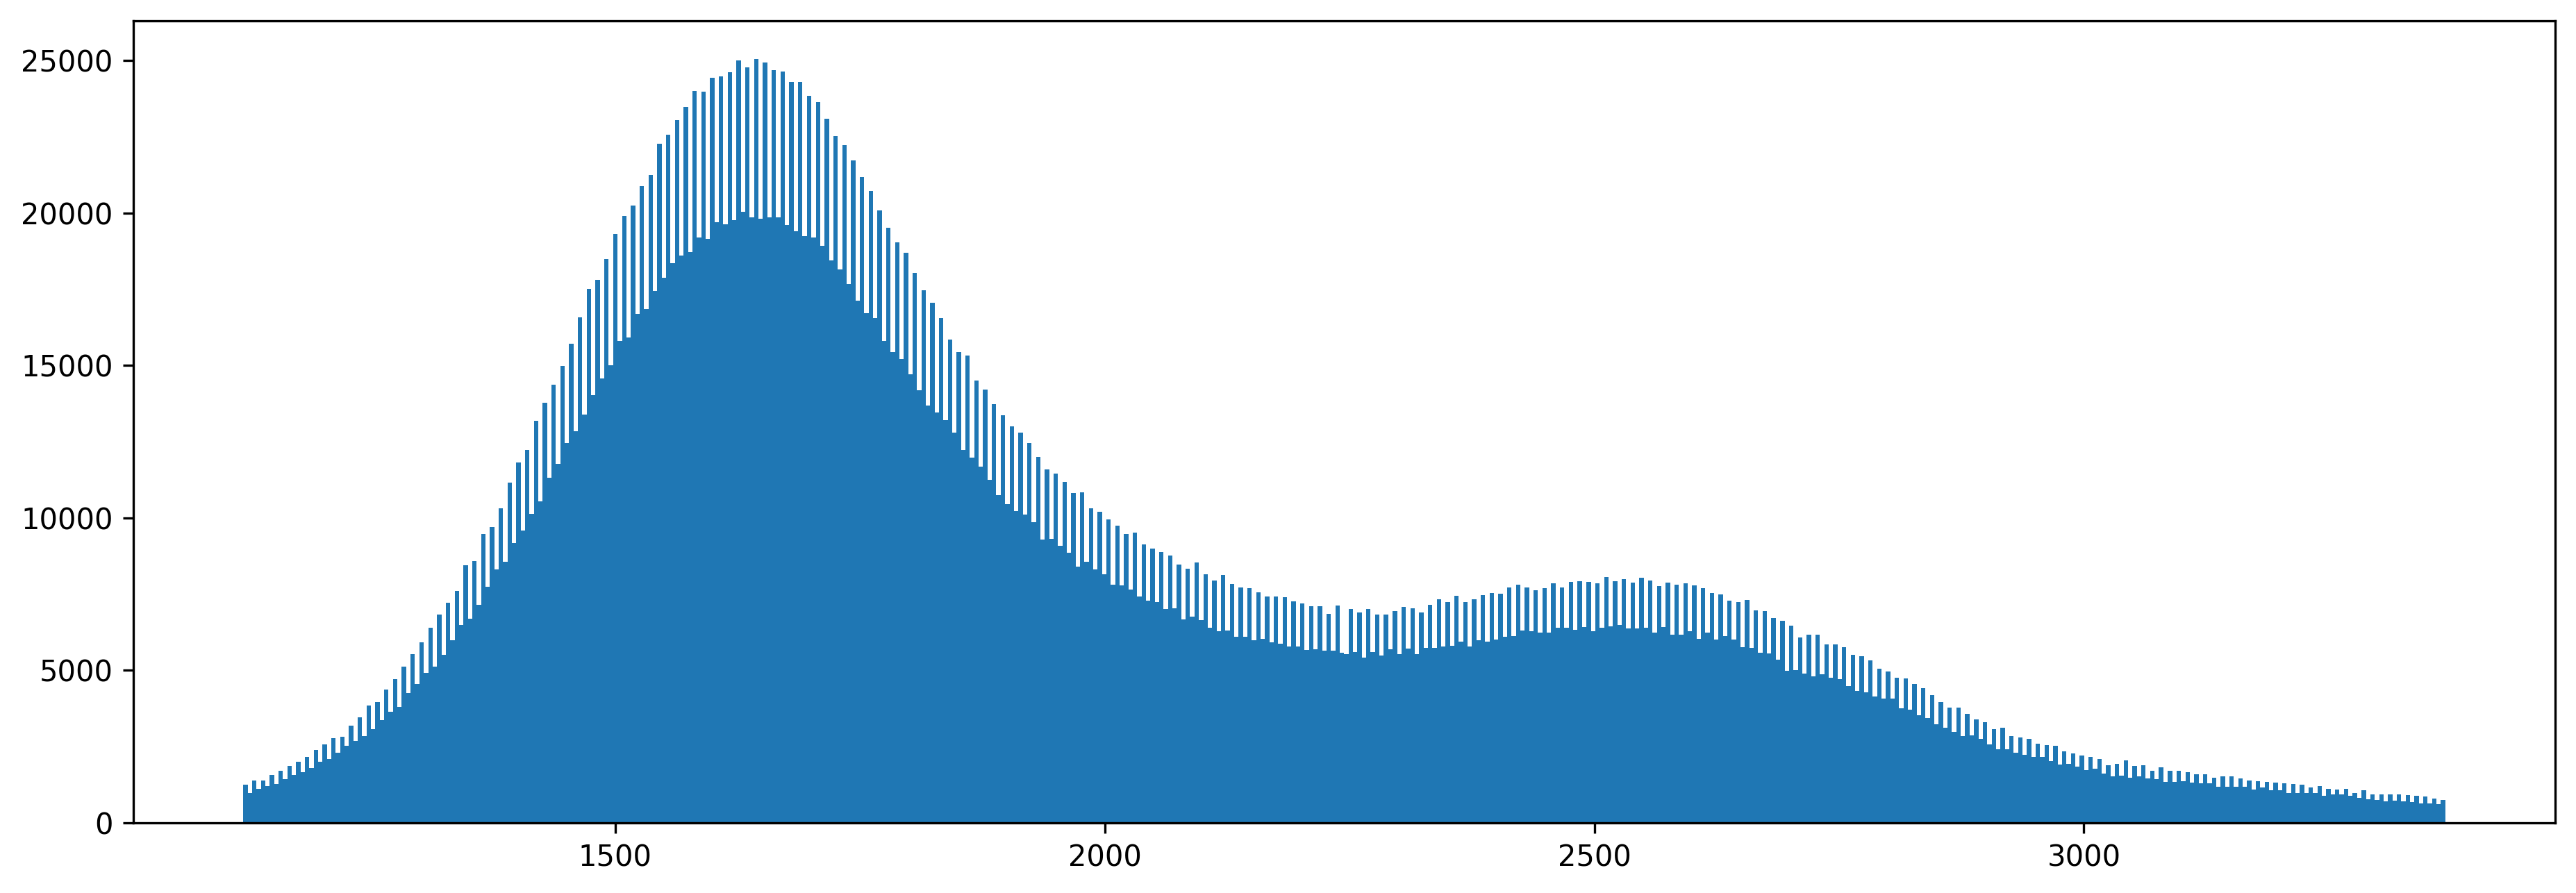

In [18]:
band = data["VNIR"]
right = band.quantile(q=0.99)
left = -(-band).quantile(.99)
plt.figure(figsize=(15,5), dpi=300)
plt.hist(band[left < band][band < right], bins=500)
plt.show()